In [1]:
%tensorflow_version 2.x

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

import tensorflow as tf

In [3]:
(train_x, train_y), (test_x, test_y) = tf.keras.datasets.cifar10.load_data()

In [4]:
train_x = train_x.astype(np.float32) / 255.
test_x = test_x.astype(np.float32) / 255.

train_y = train_y.astype(np.int32)
test_y = test_y.astype(np.int32)

print(train_x.shape, train_x.dtype)
print(test_x.shape, test_x.dtype)
print(train_y.shape, train_y.dtype)

print(test_y.shape, test_y.dtype)

(50000, 32, 32, 3) float32
(10000, 32, 32, 3) float32
(50000, 1) int32
(10000, 1) int32


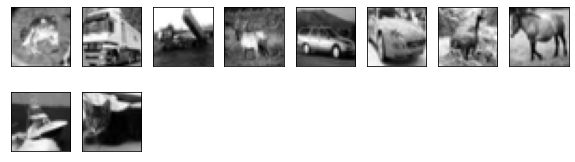

In [5]:
some_samples = train_x[:10, ...]

fig = plt.figure(figsize=(10, 6))
for j in range(some_samples.shape[0]):
    ax = fig.add_subplot(4, 8, j+1)
    ax.imshow(some_samples[j,:,:,0], cmap='gray')
    plt.xticks([]), plt.yticks([])
plt.show()

In [19]:
NUM_EPOCHS = 4
BATCH_SIZE = 128

In [20]:
train_ds = tf.data.Dataset.from_tensor_slices((train_x, train_y))
train_ds = train_ds.shuffle(buffer_size=train_x.shape[0])
train_ds = train_ds.repeat(NUM_EPOCHS)
train_ds = train_ds.batch(BATCH_SIZE)

In [26]:
class Model(tf.keras.Model):
    
    def __init__(self):
        super(Model, self).__init__()
        
        self.conv1 = tf.keras.layers.Conv2D(96, (5, 5), activation='relu', padding='same')
        self.conv2 = tf.keras.layers.Conv2D(96, (5, 5), activation='relu', padding='same')
        self.conv3 = tf.keras.layers.Conv2D(80, (5, 5), activation='relu', padding='same')
        self.conv4 = tf.keras.layers.Conv2D(64, (5, 5), activation='relu', padding='same')
        self.conv5 = tf.keras.layers.Conv2D(64, (5, 5), activation='relu', padding='same')
        self.conv6 = tf.keras.layers.Conv2D(96, (5, 5), activation='relu', padding='same')
        self.fc1 = tf.keras.layers.Dense(256, activation='relu')
        self.fc2 = tf.keras.layers.Dense(10, activation='softmax')
        self.max_pool = tf.keras.layers.MaxPooling2D((2, 2), (2, 2))
        self.flatten = tf.keras.layers.Flatten()
        
    def call(self, inp):

        out = self.conv1(inp)
        out = self.max_pool(out)
        out = self.conv2(out)
        out = self.max_pool(out)
        out = self.conv3(out)
        out = self.conv4(out)
        out = self.conv5(out)
        out = self.conv6(out)
        out = self.flatten(out)
        out = self.fc1(out)
        out = self.fc2(out)
        
        return out
    
model = Model()

In [27]:
model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [28]:
model.fit(train_ds, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 31s 19ms/step - loss: 1.9497 - accuracy: 0.2790
Epoch 2/10
1563/1563 [==============================] - 30s 19ms/step - loss: 1.4663 - accuracy: 0.4691
Epoch 3/10
1563/1563 [==============================] - 30s 19ms/step - loss: 1.2130 - accuracy: 0.5662
Epoch 4/10
1563/1563 [==============================] - 30s 19ms/step - loss: 1.0223 - accuracy: 0.6373
Epoch 5/10
1563/1563 [==============================] - 30s 19ms/step - loss: 0.8770 - accuracy: 0.6902
Epoch 6/10
1563/1563 [==============================] - 30s 19ms/step - loss: 0.7613 - accuracy: 0.7323
Epoch 7/10
1563/1563 [==============================] - 30s 19ms/step - loss: 0.6607 - accuracy: 0.7670
Epoch 8/10
1563/1563 [==============================] - 30s 19ms/step - loss: 0.5707 - accuracy: 0.8006
Epoch 9/10
1563/1563 [==============================] - 30s 19ms/step - loss: 0.4877 - accuracy: 0.8302
Epoch 10/10
1563/1563 [==============================] - 30s 19m

In [29]:
model.evaluate(test_x, test_y)

313/313 [==============================] - 2s 5ms/step - loss: 0.8504 - accuracy: 0.7360


[0.8504056930541992, 0.7360000014305115]

9
True Answer: [8]


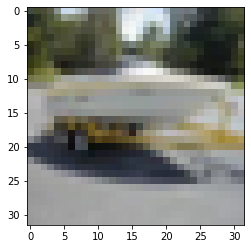

In [67]:
import random
idx = random.randint(0, test_x.shape[0])
sample = test_x[idx, ...]

plt.imshow(sample)
print(np.argmax(model(sample[None, ...])[0]))
print('True Answer: {}'.format(test_y[idx]))

In [4]:
# import seaborn as sns

In [3]:

# cifar10 = tf.keras.datasets.cifar10
# (x_train, y_train), (x_test, y_test) = cifar10.load_data()

# y_train = y_train.flatten()
# y_test = y_test.flatten()

# classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# plt.figure(figsize=(10,7))
# p = sns.countplot(y_train.flatten())
# p.set(xticklabels=classes)

# input_shape = (32, 32, 3)

# x_train=x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 3)
# x_train=x_train / 255.0
# x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 3)
# x_test=x_test / 255.0

In [2]:
# y_train = tf.one_hot(y_train.astype(np.int32), depth=10)
# y_test = tf.one_hot(y_test.astype(np.int32), depth=10)
# y_train[0]

In [79]:
# batch_size = 32
# num_classes = 10
# epochs = 50

In [82]:
# model = tf.keras.models.Sequential([
#     tf.keras.layers.Conv2D(32, 3, padding='same', input_shape=train_x.shape[1:], activation='relu'),
#     tf.keras.layers.Conv2D(32, 3, activation='relu'),
#     tf.keras.layers.MaxPooling2D(),
#     tf.keras.layers.Dropout(0.25),

#     tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
#     tf.keras.layers.Conv2D(64, 3, activation='relu'),
#     tf.keras.layers.MaxPooling2D(),
#     tf.keras.layers.Dropout(0.25),

#     tf.keras.layers.Flatten(),
#     tf.keras.layers.Dense(512, activation='relu'),
#     tf.keras.layers.Dropout(0.5),
#     tf.keras.layers.Dense(num_classes, activation='softmax'),
# ])

# model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-06),
#             loss='categorical_crossentropy', metrics=['acc'])

In [1]:
# model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs)